In [8]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data to create state codes withh long lat for hispanic data

df1=pd.read_csv("usa_states_latlong.csv")

In [3]:
df1.head()


,code,latitude,longitude,state
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [4]:
r = requests.get("https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=0&for=state:*&key=64f1dfb2f21e446d237909b1045fcde98e66d4f8")
x = r.json()

df2 = pd.DataFrame(x)
df2.head()


,0,1,2,3
0,NAME,POP,HISP,state
1,Mississippi,2976149,0,28
2,Missouri,6137428,0,29
3,Montana,1068778,0,30
4,Nebraska,1934408,0,31


In [5]:

df2 = df2.rename(columns=df2.iloc[0])
df2.head()

,NAME,POP,HISP,state
0,NAME,POP,HISP,state
1,Mississippi,2976149,0,28
2,Missouri,6137428,0,29
3,Montana,1068778,0,30
4,Nebraska,1934408,0,31


In [6]:
total_merged = df1.merge(df2, left_on="state" , right_on="NAME")
total_merged = total_merged.rename(columns = {"POP" : "total_POP"})
total_merged.head()

,code,latitude,longitude,state_x,NAME,total_POP,HISP,state_y
0,AK,63.588753,-154.493062,Alaska,Alaska,731545,0,02
1,AL,32.318231,-86.902298,Alabama,Alabama,4903185,0,01
2,AR,35.201050,-91.831833,Arkansas,Arkansas,3017804,0,05
3,AZ,34.048928,-111.093731,Arizona,Arizona,7278717,0,04
4,CA,36.778261,-119.417932,California,California,39512223,0,06


In [7]:
r = requests.get("https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=1&for=state:*&key=64f1dfb2f21e446d237909b1045fcde98e66d4f8")
x = r.json()

df3 = pd.DataFrame(x)
df3.head()

,0,1,2,3
0,NAME,POP,HISP,state
1,Mississippi,2876039,1,28
2,Missouri,5868720,1,29
3,Montana,1025489,1,30
4,Nebraska,1714763,1,31


In [8]:
df3 = df3.rename(columns=df3.iloc[0])
df3.head()

,NAME,POP,HISP,state
0,NAME,POP,HISP,state
1,Mississippi,2876039,1,28
2,Missouri,5868720,1,29
3,Montana,1025489,1,30
4,Nebraska,1714763,1,31


In [9]:
nonHispanic_merged = df1.merge(df3, left_on="state" , right_on="NAME")
nonHispanic_merged = nonHispanic_merged.rename(columns = {"POP" : "nonHispanic_POP"})
nonHispanic_merged.head()

,code,latitude,longitude,state_x,NAME,nonHispanic_POP,HISP,state_y
0,AK,63.588753,-154.493062,Alaska,Alaska,678333,1,02
1,AL,32.318231,-86.902298,Alabama,Alabama,4679907,1,01
2,AR,35.201050,-91.831833,Arkansas,Arkansas,2781173,1,05
3,AZ,34.048928,-111.093731,Arizona,Arizona,4968127,1,04
4,CA,36.778261,-119.417932,California,California,23937343,1,06


In [3]:
r = requests.get("https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&HISP=2&for=state:*&key=64f1dfb2f21e446d237909b1045fcde98e66d4f8")
x = r.json()

df4 = pd.DataFrame(x)
df4.head()

,0,1,2,3
0,NAME,POP,HISP,state
1,Mississippi,100110,2,28
2,Missouri,268708,2,29
3,Montana,43289,2,30
4,Nebraska,219645,2,31


In [4]:
df4 = df4.rename(columns=df4.iloc[0])
df4.head()

,NAME,POP,HISP,state
0,NAME,POP,HISP,state
1,Mississippi,100110,2,28
2,Missouri,268708,2,29
3,Montana,43289,2,30
4,Nebraska,219645,2,31


In [5]:
Hispanic_merged = df1.merge(df4, left_on="state" , right_on="NAME")
Hispanic_merged = Hispanic_merged.rename(columns = {"POP" : "Hispanic_POP"})
Hispanic_merged.head()

,code,latitude,longitude,state_x,NAME,Hispanic_POP,HISP,state_y
0,AK,63.588753,-154.493062,Alaska,Alaska,53212,2,02
1,AL,32.318231,-86.902298,Alabama,Alabama,223278,2,01
2,AR,35.201050,-91.831833,Arkansas,Arkansas,236631,2,05
3,AZ,34.048928,-111.093731,Arizona,Arizona,2310590,2,04
4,CA,36.778261,-119.417932,California,California,15574880,2,06


In [13]:
# as of here we have 3 dataframes with state information spread out into 3 categories
# total_merged
# nonHispanic_merged
# Hispanic_merged






In [14]:
merge1 = pd.merge(total_merged, nonHispanic_merged, on="code")
finalmerge = pd.merge(merge1, Hispanic_merged, on="code")

finalmerge.head()

,code,latitude_x,longitude_x,state_x_x,NAME_x,total_POP,HISP_x,state_y_x,latitude_y,longitude_y,...,nonHispanic_POP,HISP_y,state_y_y,latitude,longitude,state_x,NAME,Hispanic_POP,HISP,state_y
0,AK,63.588753,-154.493062,Alaska,Alaska,731545,0,02,63.588753,-154.493062,...,678333,1,02,63.588753,-154.493062,Alaska,Alaska,53212,2,02
1,AL,32.318231,-86.902298,Alabama,Alabama,4903185,0,01,32.318231,-86.902298,...,4679907,1,01,32.318231,-86.902298,Alabama,Alabama,223278,2,01
2,AR,35.201050,-91.831833,Arkansas,Arkansas,3017804,0,05,35.201050,-91.831833,...,2781173,1,05,35.201050,-91.831833,Arkansas,Arkansas,236631,2,05
3,AZ,34.048928,-111.093731,Arizona,Arizona,7278717,0,04,34.048928,-111.093731,...,4968127,1,04,34.048928,-111.093731,Arizona,Arizona,2310590,2,04
4,CA,36.778261,-119.417932,California,California,39512223,0,06,36.778261,-119.417932,...,23937343,1,06,36.778261,-119.417932,California,California,15574880,2,06


In [15]:
finalmerge= finalmerge.drop(columns=["latitude_x",
"longitude_x",
"state_x_x",
"NAME_x", 
"HISP_x",
"state_y_x",
"latitude_y",
"longitude_y",
"HISP_y",
"state_y_y",
"state_x",
"HISP",
"state_x_y",
"NAME_y",
"state_y"
])

finalmerge.head()

,code,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP
0,AK,731545,678333,63.588753,-154.493062,Alaska,53212
1,AL,4903185,4679907,32.318231,-86.902298,Alabama,223278
2,AR,3017804,2781173,35.201050,-91.831833,Arkansas,236631
3,AZ,7278717,4968127,34.048928,-111.093731,Arizona,2310590
4,CA,39512223,23937343,36.778261,-119.417932,California,15574880


In [16]:
finalmerge['total_POP'] = finalmerge['total_POP'].astype(int)
finalmerge['nonHispanic_POP'] = finalmerge['nonHispanic_POP'].astype(int)
finalmerge['Hispanic_POP'] = finalmerge['Hispanic_POP'].astype(int)

In [17]:
finalmerge["Percent_Hispanic"] = finalmerge.Hispanic_POP / finalmerge.total_POP
finalmerge.head()

,code,total_POP,nonHispanic_POP,latitude,longitude,NAME,Hispanic_POP,Percent_Hispanic
0,AK,731545,678333,63.588753,-154.493062,Alaska,53212,0.072739
1,AL,4903185,4679907,32.318231,-86.902298,Alabama,223278,0.045537
2,AR,3017804,2781173,35.201050,-91.831833,Arkansas,236631,0.078412
3,AZ,7278717,4968127,34.048928,-111.093731,Arizona,2310590,0.317445
4,CA,39512223,23937343,36.778261,-119.417932,California,15574880,0.394179


In [18]:
finalmerge.to_csv("hispanicData.csv")
finalmerge.to_json("hispanicData.json")

starting plotting of hispanic data and latitude/longitude


In [6]:
Hispanic_merged.head()

,code,latitude,longitude,state_x,NAME,Hispanic_POP,HISP,state_y
0,AK,63.588753,-154.493062,Alaska,Alaska,53212,2,02
1,AL,32.318231,-86.902298,Alabama,Alabama,223278,2,01
2,AR,35.201050,-91.831833,Arkansas,Arkansas,236631,2,05
3,AZ,34.048928,-111.093731,Arizona,Arizona,2310590,2,04
4,CA,36.778261,-119.417932,California,California,15574880,2,06


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

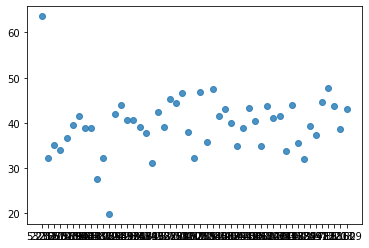

In [7]:


sns.lmplot(x="Hispanic_POP", y="latitude", data=Hispanic_merged);